Aim of this project:
To perform a comprehensive analysis using regex of the food inspections in Chicago primarily for the failed inspections!

In [105]:
import pandas as pd
import requests

In [106]:
%%time

# Define the API endpoint and parameters
url = "https://data.cityofchicago.org/resource/cwig-ma7x.json"

# Fetch the total count of records
def get_total_count(url):
    params = {
        "$select": "count(*)"
    }
    response = requests.get(url, params=params)
    data = response.json()
    return int(data[0]['count'])

total_count = get_total_count(url)
print(f"Total number of records available: {total_count:,.0f}")

Total number of records available: 265,813
CPU times: user 42.9 ms, sys: 13.2 ms, total: 56.1 ms
Wall time: 311 ms


In [107]:
%%time

# Fetch data and load it into a pandas DataFrame
def fetch_data(url, params):
    response = requests.get(url, params=params)
    data = response.json()
    return pd.DataFrame(data)

# Set the limit parameter equal to the number of available records
params = {
    "$limit": total_count
}

# Fetch the data and load it into a DataFrame
df = fetch_data(url, params)
df1 = fetch_data(url, params)
print(f'Number of records retrieved: {df.shape[0]:,.0f}')

Number of records retrieved: 265,813
CPU times: user 17.5 s, sys: 7.49 s, total: 25 s
Wall time: 1min 37s


In [108]:
df.head(5)

,inspection_id,dba_name,aka_name,license_,facility_type,risk,address,city,state,zip,...,results,violations,latitude,longitude,location,:@computed_region_awaf_s7ux,:@computed_region_6mkv_f3dw,:@computed_region_vrxf_vc4k,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu
0,2587695,Smart From The Start,Smart From The Start,2216184,Children's Services Facility,Risk 1 (High),4133-4139 W Armitage AVE,CHICAGO,IL,60639,...,Fail,"33. PROPER COOLING METHODS USED; ADEQUATE EQUIPMENT FOR TEMPERATURE CONTROL - Comments: OBSERVED 2 DOOR PREP COOLER NOT MAINTAINING PROPER TEMPERATURE 55.2F. INSTRUCTED MANAGER TO REPAIR AND MAINTAIN COOLER AT 41F OR BELOW. PREP COOLER IS TAGGED HELD FOR INSPECTION AND MUST NOT BE USED UNTIL REINSPECTED BY CHICAGO DEPARTMENT OF HEALTH. PRIORITY 7-38-005 CITATION ISSUED. | 37. FOOD PROPERLY LABELED; ORIGINAL CONTAINER - Comments: OBSERVED CONTAINERS OF SUGAR, RICE AND CEREAL NOT LABELED WITH COMMON NAME OF FOOD. INSTRUCTED TO LABEL ALL FOOD STORAGE CONTAINERS WITH COMMON NAME OF FOOD WHEN FOOD IS NOT IN ORGINAL CONTAINER. | 38. INSECTS, RODENTS, & ANIMALS NOT PRESENT - Comments: OBSERVED GAP AT LEFTSIDE BOTTOM OF FRONT EXIT OUTER DOOR. INSTRUCTED TO SEAL ALL OUTER OPENINGS TO PREVENT ...",41.917006969693496,-87.73035873163154,"{'type': 'Point', 'coordinates': [-87.73035873163154, 41.917006969693496]}",27,22615,21,135,12
1,2587724,DUKE'S,DUKE'S,2431752,Restaurant,Risk 1 (High),5659 N CENTRAL AVE,CHICAGO,IL,60646,...,Pass,"36. THERMOMETERS PROVIDED & ACCURATE - Comments: OBSERVED THERMOMETER IN 2 DOOR PREP COOLER LOCATED OPPOSITE GRILL NOT WORKING. INSTRUCTED TO REPAIR OR REPLACE AND MAINTAIN IN GOOD CONDITION. | 51. PLUMBING INSTALLED; PROPER BACKFLOW DEVICES - Comments: OBSERVED NO BACKFLOW PREVENTION DEVICE AT UTILITY SINK LOCATED IN EMPLOYEE TOILET ROOM. INSTRUCTED TO INSTALL IN ACCORDANCE WITH ALL RELEVANT LAWS, RULES, AND REGULATIONS. | 53. TOILET FACILITIES: PROPERLY CONSTRUCTED, SUPPLIED, & CLEANED - Comments: OBSERVED NO COVERED TRASH RECEPTACLE INSIDE UNISEX EMPLOYEE TOILET ROOM. INSTRUCTED TO PROVIDE. | 57. ALL FOOD EMPLOYEES HAVE FOOD HANDLER TRAINING - Comments: OBSERVED 1 EMPLOYEE WITH NO FOOD HANDLER TRAINING. INSTRUCTED ALL EMPLOYEES MUST COMPLETE FOOD HANDLER TRAINING AND MAINTAIN RECORD...",41.984618430365195,-87.76815926802585,"{'type': 'Point', 'coordinates': [-87.76815926802585, 41.984618430365195]}",20,22532,11,701,50
2,2587698,THE LEARNING EXPERIENCE,THE LEARNING EXPERIENCE,2516680,Children's Services Facility,Risk 1 (High),4110 W Peterson AVE,CHICAGO,IL,60646,...,Pass,"47. FOOD & NON-FOOD CONTACT SURFACES CLEANABLE, PROPERLY DESIGNED, CONSTRUCTED & USED - Comments: OBSERVED CUTTING BOARD IN KITCHEN PREP AREA COVERED IN DEEP GROOVES AND DARK STAINS. INSTRUCTED TO REPAIR OR REPLACE AND MAINTAIN SMOOTH, CLEANABLE CUTTING SURFACES. | 51. PLUMBING INSTALLED; PROPER BACKFLOW DEVICES - Comments: OBSERVED LOOSE FAUCET AT HANDWASHING SINK LOCATED IN REAR KITCHEN PREP AREA. INSTRUCTED TO REPAIR OR REPLACE AND MAINTAIN IN GOOD CONDITION. | 55. PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN - Comments: OBSERVED BUILD UP OF FOOD DEBRIS AND GRIME ON INTERIOR OF PREP COOLER LOCATED IN REAR PREP KITCHEN. INSTRUCTED TO DETAIL CLEAN AND MAINTAIN IN GOOD CONDITION.",41.9902048994482,-87.73177133891328,"{'type': 'Point', 'coordinates': [-87.73177133891328, 41.9902048994482]}",28,22532,13,748,38
3,2587712,MORRILL,MORRILL,24571,School,Risk 1 (High),6011 S Rockwell (2600W) AVE,CHICAGO,IL,60629,...,Fail,"5. PROCEDURES FOR RESPONDING TO VOMITING AND DIARRHEAL EVENTS - Comments: MISSING SUPPLIES AND PROCEDURE FOR RESPONDING TO VOMITING AND DIARRHEAL EVENTS. INSTD TO PROVIDE SUPPLIES AND PROCEDURE (EFFECTIVE AGAINST NOROVIRUS) AND MAINTAIN ON SITE. PRIORITY FOUNDATION 7-38-005 | 10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE - Comments: MISSING HANDWASH SIGNAGE AT HANDWASH SINK IN PREP AREA AND AT HANDWASH SINKS IN STUDENT AND STAFF TOILET ROOMS. INSTD TO OBTAIN SIGNAGE AND MAINTAIN. | 22. P

In [109]:
df.shape

(265813, 22)

Only the records corresponding to 'Failed' inspection are being checked for.

In [110]:
df = df[df['results']=='Fail']

In [111]:
df.head()

,inspection_id,dba_name,aka_name,license_,facility_type,risk,address,city,state,zip,...,results,violations,latitude,longitude,location,:@computed_region_awaf_s7ux,:@computed_region_6mkv_f3dw,:@computed_region_vrxf_vc4k,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu
0,2587695,Smart From The Start,Smart From The Start,2216184,Children's Services Facility,Risk 1 (High),4133-4139 W Armitage AVE,CHICAGO,IL,60639,...,Fail,"33. PROPER COOLING METHODS USED; ADEQUATE EQUIPMENT FOR TEMPERATURE CONTROL - Comments: OBSERVED 2 DOOR PREP COOLER NOT MAINTAINING PROPER TEMPERATURE 55.2F. INSTRUCTED MANAGER TO REPAIR AND MAINTAIN COOLER AT 41F OR BELOW. PREP COOLER IS TAGGED HELD FOR INSPECTION AND MUST NOT BE USED UNTIL REINSPECTED BY CHICAGO DEPARTMENT OF HEALTH. PRIORITY 7-38-005 CITATION ISSUED. | 37. FOOD PROPERLY LABELED; ORIGINAL CONTAINER - Comments: OBSERVED CONTAINERS OF SUGAR, RICE AND CEREAL NOT LABELED WITH COMMON NAME OF FOOD. INSTRUCTED TO LABEL ALL FOOD STORAGE CONTAINERS WITH COMMON NAME OF FOOD WHEN FOOD IS NOT IN ORGINAL CONTAINER. | 38. INSECTS, RODENTS, & ANIMALS NOT PRESENT - Comments: OBSERVED GAP AT LEFTSIDE BOTTOM OF FRONT EXIT OUTER DOOR. INSTRUCTED TO SEAL ALL OUTER OPENINGS TO PREVENT ...",41.917006969693496,-87.73035873163154,"{'type': 'Point', 'coordinates': [-87.73035873163154, 41.917006969693496]}",27,22615,21,135,12
3,2587712,MORRILL,MORRILL,24571,School,Risk 1 (High),6011 S Rockwell (2600W) AVE,CHICAGO,IL,60629,...,Fail,"5. PROCEDURES FOR RESPONDING TO VOMITING AND DIARRHEAL EVENTS - Comments: MISSING SUPPLIES AND PROCEDURE FOR RESPONDING TO VOMITING AND DIARRHEAL EVENTS. INSTD TO PROVIDE SUPPLIES AND PROCEDURE (EFFECTIVE AGAINST NOROVIRUS) AND MAINTAIN ON SITE. PRIORITY FOUNDATION 7-38-005 | 10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE - Comments: MISSING HANDWASH SIGNAGE AT HANDWASH SINK IN PREP AREA AND AT HANDWASH SINKS IN STUDENT AND STAFF TOILET ROOMS. INSTD TO OBTAIN SIGNAGE AND MAINTAIN. | 22. PROPER COLD HOLDING TEMPERATURES - Comments: OBSERVED YOGURT AND MILK AT IMPROPER COLD HOLDING TEMPERATURES ON TABLE AT MAIN ENTRANCE FOR GRAB N GO BREAKFAST FOR STUDENTS. YOGURT 62.4F AND MILK AT 50.2F. INSTD TO MAINTAIN COLD FOODS AT 41F OR BELOW AT ALL TIMES DURING DISPLAY, SERVICE A...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2587733,ACE FOOD MART,ACE FOOD MART,2901243,Grocery Store,Risk 2 (Medium),657 E 79 ST,Chicago,IL,60619,...,Fail,"38. INSECTS, RODENTS, & ANIMALS NOT PRESENT - Comments: STILL FINDING MOUSE DROPPINGS ON THE FLOOR IN THE WASHROOM, IN THE REAR STORAGE ROOM ON THE FLOOR AND ON THE FRONT WINDOW SILL; INSTRUCTED TO CLEAN AREAS TO REMOVE DROPPINGS. PRIORITY VIOLATION 7-38-020(A). | 39. CONTAMINATION PREVENTED DURING FOOD PREPARATION, STORAGE & DISPLAY - Comments: OBSERVED THE DISHWASHING/ FOOD PREP AREA NOT PROTECTED FROM THE PUBLIC. INSTRUCTED TO PROVIDE AN APPROPRIATE BARRIER IN THE SAID AREA TO PREVENT CONTAMINATION FROM THE PUBLIC AND MAINTAIN. | 47. FOOD & NON-FOOD CONTACT SURFACES CLEANABLE, PROPERLY DESIGNED, CONSTRUCTED & USED - Comments: THE WALL IN THE DISHWASHING AREA AROUND AND UNDER THE EXPOSED HANDSINK IS NOT SMOOTH AND EASILY CLEANABLE; INSTRUCTED TO PAINT WALL. | 53. TOILET FACILITIES:...",41.75113132285834,-87.60779910111297,"{'type': 'Point', 'coordinates': [-87.60779910111297, 41.75113132285834]}",31,21546,40,11,32
11,2587681,PETE'S FRESH MARKET,PETE'S FRESH MARKET,2309123,Grocery Store,Risk 1 (High),2333 W MADISON ST,CHICAGO,IL,60612,...,Fail,"16. FOOD-CONTACT SURFACES: CLEANED & SANITIZED - Comments: OBSERVED BOTH HIGH-TEMPERATURE DISHWASHING MACHINES NOT REACHING THE REQUIRED FINAL RINSE TEMPERATURE OF 180F OR ABOVE. THE DISH MACHINE IN THE BAKERY PREP AREA SHOWED A FINAL RINSE TEMPERATURE OF 78F, AND THE DISH MACHINE IN THE MAIN KITCHEN PREP AREA SHOWED A FINAL RINSE TEMPERATURE OF 117F. BOTH DISH MACHINES WERE USED WITH SHEET TRAYS AND LARGE POTS STORED INSIDE BOTH DISHWASHING MACHINES. MANAGEMENT INSTRUCTED TO REPAIR BOTH DISHWASHING MACHINES SO TH

Cleaning the data, making sure that there are no NaNs in "violations" column as the analysis is based on it

In [112]:
df[df['violations'].isna()]

,inspection_id,dba_name,aka_name,license_,facility_type,risk,address,city,state,zip,...,results,violations,latitude,longitude,location,:@computed_region_awaf_s7ux,:@computed_region_6mkv_f3dw,:@computed_region_vrxf_vc4k,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu
209,2587394,FULTON MARKET KITCHEN,FULTON MARKET KITCHEN,2944289,Restaurant,Risk 3 (Low),311 N SANGAMON ST,CHICAGO,IL,60607,...,Fail,NaN,41.887114585601694,-87.65087022605566,"{'type': 'Point', 'coordinates': [-87.65087022605566, 41.887114585601694]}",41,14917,29,63,46
299,2587306,TAPICOZZA,TAPICOZZA,2944208,Restaurant,Risk 1 (High),1002 W LAKE ST,CHICAGO,IL,60607,...,Fail,NaN,41.885691117841525,-87.6522896923192,"{'type': 'Point', 'coordinates': [-87.6522896923192, 41.885691117841525]}",41,14917,29,63,46
447,2587123,EL CAPITAN SNACKS LLC,EL CAPITAN SNACKS LLC,2943914,Restaurant,Risk 1 (High),3150 N CENTRAL AVE,CHICAGO,IL,60634,...,Fail,NaN,41.93825446024883,-87.76663539027273,"{'type': 'Point', 'coordinates': [-87.76663539027273, 41.93825446024883]}",27,22254,19,82,17
614,2586931,MAXWELLS TRADING,MAXWELLS TRADING,2938838,Restaurant,Risk 1 (High),1516 W CARROLL ST,CHICAGO,IL,60607,...,Fail,NaN,41.88752359761481,-87.66509874730654,"{'type': 'Point', 'coordinates': [-87.66509874730654, 41.88752359761481]}",41,14917,29,63,46
628,2586934,MAXWELLS TRADING,MAXWELLS TRADING,2938839,Restaurant,Risk 1 (High),1516 W CARROLL ST,CHICAGO,IL,60607,...,Fail,NaN,41.88752359761481,-87.66509874730654,"{'type': 'Point', 'coordinates': [-87.66509874730654, 41.88752359761481]}",41,14917,29,63,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265692,67784,"SURF & TURF WHERE SEAFOOD & STEAK MEET, INC.","SURF & TURF WHERE SEAFOOD & STEAK MEET, INC.",1869406,Restaurant,Risk 1 (High),13205 S MUSKEGON AVE,CHICAGO,IL,60633,...,Fail,NaN,41.65535108240333,-87.55428020662902,"{'type': 'Point', 'coordinates': [-87.55428020662902, 41.65535108240333]}",47,22250,52,586,47
265745,67760,MC INTOSH'S,MC INTOSH'S,1648623,NaN,Risk 1 (High),748 W 61ST ST,CHICAGO,IL,60621,...,Fail,NaN,41.783502980089736,-87.64438637632864,"{'type': 'Point', 'coordinates': [-87.64438637632864, 41.783502980089736]}",19,21559,66,22,2
265746,78240,OBAMA FOOD MART,NaN,2004238,Grocery Store,Risk 3 (Low),1800 E 79TH ST,CHICAGO,IL,60649,...,Fail,NaN,41.75165523778611,-87.58082842408824,"{'type': 'Point', 'coordinates': [-87.58082842408824, 41.75165523778611]}",9,22538,39,188,35
265764,67756,LAGNIAPPE-A CREOLE CAJUN JOYNT,LAGNIAPPE-A CREOLE CAJUN JOYNT,1986108,RIVERWALK CAFE,Risk 2 (Medium),55 W RIVERWALK SOUTH,CHICAGO,IL,60601,...,Fail,NaN,41.88695199839048,-87.62987459293426,"{'type': 'Point', 'coordinates': [-87.62987459293426, 41.88695199839048]}",22,14309,38,92,36


In [113]:
df.shape

(51875, 22)

In [114]:
df.dropna(subset=['violations'], inplace=True)

Using regular expression to parse "Violations" column to select only regulation descriptions

In [115]:
import re

def desc(text):
    match = re.findall(r'\d{1,2}\.\s(.*?)(?=\s\-|\s\||\|)',str(text))
    return match
    

In [116]:
pd.set_option('max_colwidth', 800)

Putting the parsed violations in a new column to not disturb the original column 'violations'. New column is called 'descriptions'. I did it just to not disturb the original dataset in case I needed to make corrections at any point

In [117]:
df['descriptions'] = df['violations'].apply(lambda x: re.findall(r'^\d{1,2}\.\s(.*?)(?=\s\-|\s\||\|)|\s\|\s\d{1,2}\.\s(.*?)(?=\s\-|\s\||\|)',x))

In [118]:
df.head(10)

,inspection_id,dba_name,aka_name,license_,facility_type,risk,address,city,state,zip,...,violations,latitude,longitude,location,:@computed_region_awaf_s7ux,:@computed_region_6mkv_f3dw,:@computed_region_vrxf_vc4k,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu,descriptions
0,2587695,Smart From The Start,Smart From The Start,2216184,Children's Services Facility,Risk 1 (High),4133-4139 W Armitage AVE,CHICAGO,IL,60639,...,"33. PROPER COOLING METHODS USED; ADEQUATE EQUIPMENT FOR TEMPERATURE CONTROL - Comments: OBSERVED 2 DOOR PREP COOLER NOT MAINTAINING PROPER TEMPERATURE 55.2F. INSTRUCTED MANAGER TO REPAIR AND MAINTAIN COOLER AT 41F OR BELOW. PREP COOLER IS TAGGED HELD FOR INSPECTION AND MUST NOT BE USED UNTIL REINSPECTED BY CHICAGO DEPARTMENT OF HEALTH. PRIORITY 7-38-005 CITATION ISSUED. | 37. FOOD PROPERLY LABELED; ORIGINAL CONTAINER - Comments: OBSERVED CONTAINERS OF SUGAR, RICE AND CEREAL NOT LABELED WITH COMMON NAME OF FOOD. INSTRUCTED TO LABEL ALL FOOD STORAGE CONTAINERS WITH COMMON NAME OF FOOD WHEN FOOD IS NOT IN ORGINAL CONTAINER. | 38. INSECTS, RODENTS, & ANIMALS NOT PRESENT - Comments: OBSERVED GAP AT LEFTSIDE BOTTOM OF FRONT EXIT OUTER DOOR. INSTRUCTED TO SEAL ALL OUTER OPENINGS TO PREVENT ...",41.917006969693496,-87.73035873163154,"{'type': 'Point', 'coordinates': [-87.73035873163154, 41.917006969693496]}",27,22615,21,135,12,"[(PROPER COOLING METHODS USED; ADEQUATE EQUIPMENT FOR TEMPERATURE CONTROL, ), (, FOOD PROPERLY LABELED; ORIGINAL CONTAINER), (, INSECTS, RODENTS, & ANIMALS NOT PRESENT), (, GARBAGE & REFUSE PROPERLY DISPOSED; FACILITIES MAINTAINED), (, PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN), (, PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN), (, ADEQUATE VENTILATION & LIGHTING; DESIGNATED AREAS USED), (, ADEQUATE VENTILATION & LIGHTING; DESIGNATED AREAS USED)]"
3,2587712,MORRILL,MORRILL,24571,School,Risk 1 (High),6011 S Rockwell (2600W) AVE,CHICAGO,IL,60629,...,"5. PROCEDURES FOR RESPONDING TO VOMITING AND DIARRHEAL EVENTS - Comments: MISSING SUPPLIES AND PROCEDURE FOR RESPONDING TO VOMITING AND DIARRHEAL EVENTS. INSTD TO PROVIDE SUPPLIES AND PROCEDURE (EFFECTIVE AGAINST NOROVIRUS) AND MAINTAIN ON SITE. PRIORITY FOUNDATION 7-38-005 | 10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE - Comments: MISSING HANDWASH SIGNAGE AT HANDWASH SINK IN PREP AREA AND AT HANDWASH SINKS IN STUDENT AND STAFF TOILET ROOMS. INSTD TO OBTAIN SIGNAGE AND MAINTAIN. | 22. PROPER COLD HOLDING TEMPERATURES - Comments: OBSERVED YOGURT AND MILK AT IMPROPER COLD HOLDING TEMPERATURES ON TABLE AT MAIN ENTRANCE FOR GRAB N GO BREAKFAST FOR STUDENTS. YOGURT 62.4F AND MILK AT 50.2F. INSTD TO MAINTAIN COLD FOODS AT 41F OR BELOW AT ALL TIMES DURING DISPLAY, SERVICE A...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[(PROCEDURES FOR RESPONDING TO VOMITING AND DIARRHEAL EVENTS, ), (, ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE), (, PROPER COLD HOLDING TEMPERATURES), (, INSECTS, RODENTS, & ANIMALS NOT PRESENT), (, PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN)]"
5,2587733,ACE FOOD MART,ACE FOOD MART,2901243,Grocery Store,Risk 2 (Medium),657 E 79 ST,Chicago,IL,60619,...,"38. INSECTS, RODENTS, & ANIMALS NOT PRESENT - Comments: STILL FINDING MOUSE DROPPINGS ON THE FLOOR IN THE WASHROOM, IN THE REAR STORAGE ROOM ON THE FLOOR AND ON THE FRONT WINDOW SILL; INSTRUCTED TO CLEAN AREAS TO REMOVE DROPPINGS. PRIORITY VIOLATION 7-38-020(A). | 39. CONTAMINATION PREVENTED DURING FOOD PREPARATION, STORAGE & DISPLAY - Comments: OBSERVED THE DISHWASHING/ FOOD PREP AREA NOT PROTECTED FROM THE PUBLIC. INSTRUCTED TO PROVIDE AN APPROPRIATE BARRIER IN THE SAID AREA TO PREVENT CONTAMINATION FROM THE PUBLIC AND MAINTAIN. | 47. FOOD & NON-FOOD CONTACT SURFACES CLEANABLE, PROPERLY DESIGNED, CONSTRUCTED & USED - Comments: THE WALL IN THE DISHWASHING AREA AROUND AND UNDER THE EXPOSED HANDSINK IS NOT SMOOTH AND EASILY CLEANABLE; INSTRUCTED TO PAINT WALL. | 53. TOILET FACILITIES:...",41.75113132285834,-87.60779910111297,"{'type': 'Point', '

the resulting regex expression I got was in form of a tuple so I am using this loop to unpack it into a list named 'vio'

In [119]:
vio = list()
for i in df['descriptions']:
    for j in i:
        if j[0]=='':
            vio.append(j[1])
        elif j[1]=='':
            vio.append(j[0])

        

In [120]:
vio

['PROPER COOLING METHODS USED; ADEQUATE EQUIPMENT FOR TEMPERATURE CONTROL',
 'FOOD PROPERLY LABELED; ORIGINAL CONTAINER',
 'INSECTS, RODENTS, & ANIMALS NOT PRESENT',
 'GARBAGE & REFUSE PROPERLY DISPOSED; FACILITIES MAINTAINED',
 'PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN',
 'PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN',
 'ADEQUATE VENTILATION & LIGHTING; DESIGNATED AREAS USED',
 'ADEQUATE VENTILATION & LIGHTING; DESIGNATED AREAS USED',
 'PROCEDURES FOR RESPONDING TO VOMITING AND DIARRHEAL EVENTS',
 'ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE',
 'PROPER COLD HOLDING TEMPERATURES',
 'INSECTS, RODENTS, & ANIMALS NOT PRESENT',
 'PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN',
 'INSECTS, RODENTS, & ANIMALS NOT PRESENT',
 'CONTAMINATION PREVENTED DURING FOOD PREPARATION, STORAGE & DISPLAY',
 'FOOD & NON-FOOD CONTACT SURFACES CLEANABLE, PROPERLY DESIGNED, CONSTRUCTED & USED',
 'TOILET FACILITIES: PROPERLY CONSTRUCTED, SUPPLIED, & CLEANED',
 'PHYSICAL FACILIT

Counting how many times each regulation description occurred in the table & Visualizing top-10 the most frequent regulation descriptions

In [121]:
pd.Series(vio).value_counts().reset_index().rename(columns={"index": "violation", 0: "count"})

,violation,count
0,"FLOORS: CONSTRUCTED PER CODE, CLEANED, GOOD REPAIR, COVING INSTALLED, DUST-LESS CLEANING METHODS USED",19370
1,"PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN",19019
2,"WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTRUCTED PER CODE: GOOD REPAIR, SURFACES CLEAN AND DUST-LESS CLEANING METHODS",18255
3,"FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSILS CLEAN, FREE OF ABRASIVE DETERGENTS",16445
4,"NO EVIDENCE OF RODENT OR INSECT OUTER OPENINGS PROTECTED/RODENT PROOFED, A WRITTEN LOG SHALL BE MAINTAINED AVAILABLE TO THE INSPECTORS",16431
...,...,...
104,FOOD ADDITIVES: APPROVED AND PROPERLY USED,3
105,WASHING FRUITS & VEGETABLES,2
106,PASTEURIZED EGGS USED WHERE REQUIRED,1
107,PLANT FOOD PROPERLY COOKED FOR HOT HOLDING,1


In [122]:
top_10 = pd.Series(vio).value_counts(ascending=False).head(10)

<AxesSubplot:>

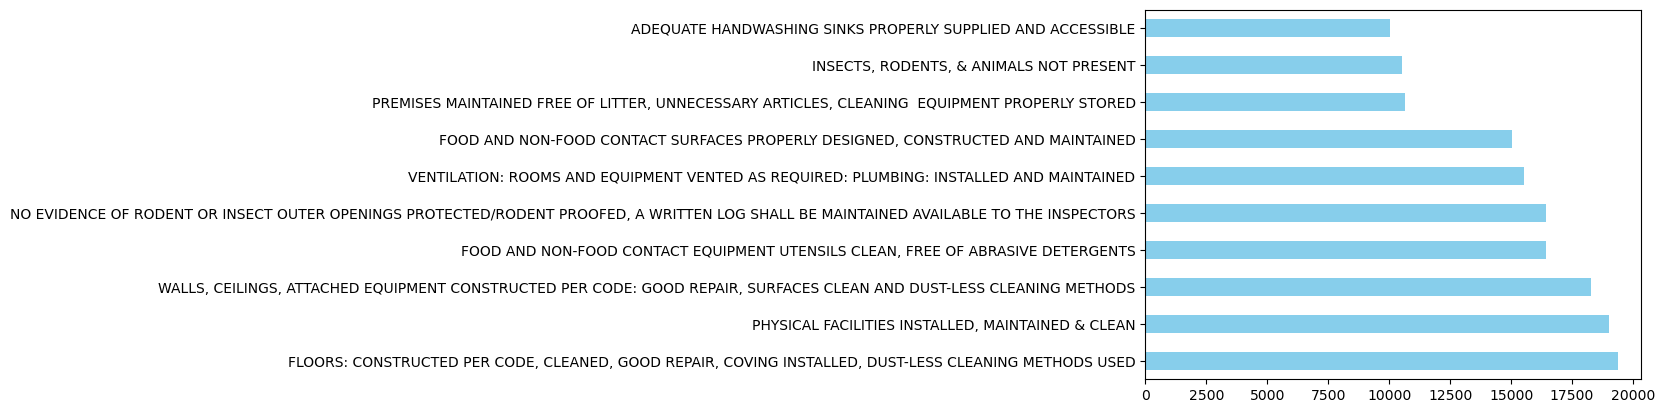

In [123]:
top_10.plot(kind='barh', color='skyblue')

Identifing whether any of these restaurants are repeat offenders (explore a combination of License; Business Name and Address variables to determine what is the best way to uniquely identify a business) and whether the violations are the same or different for these repeat offenses

In [124]:
df['dba_name'].value_counts()

SUBWAY                         435
DUNKIN DONUTS                  275
MCDONALD'S                     122
7-ELEVEN                        75
MCDONALDS                       63
                              ... 
COTTAGE GROVE GROCERY, INC.      1
TORTILLERIA EL MOLINO            1
CREMERIA SANTA MARIA             1
VLIVE                            1
BORNIQUEN RESTAURANT             1
Name: dba_name, Length: 18066, dtype: int64

In [125]:
df['license_'].value_counts()

0          155
14616       33
39623       21
25152       21
2125165     20
          ... 
2240854      1
2827245      1
2203103      1
2359772      1
32942        1
Name: license_, Length: 21343, dtype: int64

In [126]:
df['address'].value_counts()

11601 W TOUHY AVE             365
2300 S THROOP ST              136
500 W MADISON ST               97
324 N LEAVITT ST               83
7601 S CICERO AVE              53
                             ... 
703 S SEELEY AVE                1
7100-7114 S VINCENNES AVE       1
11810 S WESTERN AVE             1
219 N GREEN ST                  1
8750 W BRYN WAWR AVE            1
Name: address, Length: 14145, dtype: int64

In [127]:
df.groupby(['license_','address'])['dba_name'].count()

license_  address             
0         10111 S EWING AVE       1
          10148 S EWING AVE       1
          1060 E 47TH ST          2
          10857 S HALSTED ST      1
          109 E 51ST ST           1
                                 ..
9845      2551 S KEDZIE AVE       1
9890      8300 S KEDZIE AVE       6
99        203 N LA SALLE ST       1
990       2806 W 40TH PL          5
99050     7836 S Union (700W)     4
Name: dba_name, Length: 21536, dtype: int64

Feature engineering a new variable 'dba_id' to determine the unique name for a Business 

In [128]:
df['dba_id']= df['license_']+df['dba_name']+df['address']

In [129]:
df['dba_id']

0          2216184Smart From The Start4133-4139 W Armitage AVE 
3                      24571MORRILL6011 S Rockwell (2600W) AVE 
5                              2901243ACE FOOD MART657 E 79 ST 
11                 2309123PETE'S FRESH MARKET2333 W MADISON ST 
13                     2738649POPEYE'S  # 8667617 S RACINE AVE 
                                  ...                          
265793         75567CHICAGO SINAI CONGREGATION15 W DELAWARE PL 
265796    1357260IZUMI SUSHI BAR & RESTAURANT731 W RANDOLPH ST 
265798          32942BORNIQUEN RESTAURANT1720 N CALIFORNIA AVE 
265807                          80916TEMPO CAFE6 E CHESTNUT ST 
265809       2008948MICHAEL'S ON MAIN CAFE8750 W BRYN WAWR AVE 
Name: dba_id, Length: 48447, dtype: object

In [130]:
repeat = pd.Series(df['dba_id'].value_counts()[df['dba_id'].value_counts()>1].index)

In [131]:
repeat

0                              39623LUMES PANCAKE HOUSE11601 S WESTERN AVE 
1                            60184TAQUERIA EL RANCHITO2829 N MILWAUKEE AVE 
2                                  1095992LAS ISLAS MARIAS4770 W GRAND AVE 
3                                        1909713IYANZE4623-4627 N BROADWAY 
4                  2125165LUIGI'S PIZZA BY THE SLICE, INC4212 W MADISON ST 
                                        ...                                
10882                      2535167CARNITAS DON RAFA, INC.4597 S ARCHER AVE 
10883                                          1770566WILDE3130 N BROADWAY 
10884    2698241LAZY CAMEL & WESTERN WINE & SPIRITS2218-2222 N WESTERN AVE 
10885                   12602NEIGHBORHOOD DELI-GROC9001-9003 S ASHLAND AVE 
10886                                    2708872DEEP PURPL500 W MADISON ST 
Length: 10887, dtype: object

In [132]:
#repeat[:5]

Showing how often a popular violation is present in the repeat offenders 

In [133]:
x = df[df['dba_id'].isin(repeat)==True]['descriptions']

Since the violations count outnumber the repeat offenders count, the violations are the same for these repeat offenses

In [134]:
vioList = list()
for i in x:
    for j in i:
        if j[0]=='':
            vioList.append(j[1])
        elif j[1]=='':
            vioList.append(j[0])



In [135]:
pd.Series(vioList).value_counts().reset_index().head(5)

,index,0
0,"PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN",15736
1,"FLOORS: CONSTRUCTED PER CODE, CLEANED, GOOD REPAIR, COVING INSTALLED, DUST-LESS CLEANING METHODS USED",15396
2,"WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTRUCTED PER CODE: GOOD REPAIR, SURFACES CLEAN AND DUST-LESS CLEANING METHODS",14410
3,"FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSILS CLEAN, FREE OF ABRASIVE DETERGENTS",13411
4,"NO EVIDENCE OF RODENT OR INSECT OUTER OPENINGS PROTECTED/RODENT PROOFED, A WRITTEN LOG SHALL BE MAINTAINED AVAILABLE TO THE INSPECTORS",12601


These figues show that the offenses have been repeated!

In [136]:
df.groupby('dba_id')['violations'].count().reset_index()

,dba_id,violations
0,016TH STREET NEWSSTAND3934 W 16TH ST,1
1,0AGUDATH ISREAL OF ILLINOIS2828 W PRATT BLVD,1
2,0ANTIOCH MISSIONARY BAPTIST CHURCH415 W ENGLEWOOD AVE,2
3,0ASADO COFFEE ROASTERS22 E JACKSON BLVD,1
4,0ASSUMPTION BVM CHURCH2434 S CALIFORNIA AVE,3
...,...,...
21892,9890L & M STARLIGHT RESTAURANT INC8300 S KEDZIE AVE,6
21893,99050CYDI COMMUNITY YOUTH DEVELOPMENT INSTITUTE7836 S Union (700W),4
21894,990FALCO'S PIZZA2806 W 40TH PL,5
21895,99XANDO COFFEE & BAR / COSI SANDWICH BAR203 N LA SALLE ST,1


Review of the restaurants - "Out of Business"

Creating a new dataframe for 'Out of Business' results

In [137]:
df1 = df1[df1['results']=='Out of Business']

In [138]:
df1.head()


,inspection_id,dba_name,aka_name,license_,facility_type,risk,address,city,state,zip,...,results,violations,latitude,longitude,location,:@computed_region_awaf_s7ux,:@computed_region_6mkv_f3dw,:@computed_region_vrxf_vc4k,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu
40,2587575,CARLTON INN MIDWAY,CARLTON INN MIDWAY,2263302,Restaurant,Risk 3 (Low),4944 S ARCHER AVE,CHICAGO,IL,60632,...,Out of Business,NaN,41.80346698060006,-87.72178642964842,"{'type': 'Point', 'coordinates': [-87.72178642964842, 41.80346698060006]}",49,22248,54,698,8
41,2587581,DAKOTA 94,DAKOTA 94,2652613,Restaurant,Risk 1 (High),5304 W Devon AVE,CHICAGO,IL,60646,...,Out of Business,NaN,41.997436752172106,-87.76100260054012,"{'type': 'Point', 'coordinates': [-87.76100260054012, 41.997436752172106]}",34,22532,12,782,29
63,2587579,SUBWAY,SUBWAY,1719251,Restaurant,Risk 1 (High),10354 S HALSTED ST,CHICAGO,IL,60628,...,Out of Business,NaN,41.705296492547895,-87.64293095094614,"{'type': 'Point', 'coordinates': [-87.64293095094614, 41.705296492547895]}",45,21861,72,595,22
78,2587625,"TAQUERIA EL ARCO #3 EL POLLO FELIZ, INC.",EL POLLO CRIS CRIS #3,1964458,Restaurant,Risk 1 (High),7023-7025 S PULASKI RD,CHICAGO,IL,60629,...,Out of Business,NaN,41.765126421774134,-87.72227898862089,"{'type': 'Point', 'coordinates': [-87.72227898862089, 41.765126421774134]}",23,21867,63,317,15
101,2587549,KENWOOD LIQUORS,KENWOOD LIQUORS,4435,NaN,Risk 3 (Low),8810 S STONY ISLAND AVE,CHICAGO,IL,60617,...,Out of Business,NaN,41.73471949269338,-87.58574503461055,"{'type': 'Point', 'coordinates': [-87.58574503461055, 41.73471949269338]}",9,21202,44,490,35


In [139]:
df1.dropna(subset=['violations'], inplace=True)

In [140]:
df1['dba_id']= df1['license_']+df1['dba_name']+df1['address']

An extended history of prior violations for the closed restaurants

In [141]:
df1[df1['dba_id'].isin(df['dba_id'])==True][['dba_name','violations']]

,dba_name,violations
9998,7-ELEVEN #25431,"43. IN-USE UTENSILS: PROPERLY STORED - Comments: RELOCATE UTENSILS STORED FROM ABOVE THREE COMPARTMENT SINK (ALMOST TOUCHING COMPARTMENT) AND MAINTAIN. | 47. FOOD & NON-FOOD CONTACT SURFACES CLEANABLE, PROPERLY DESIGNED, CONSTRUCTED & USED - Comments: DO NOT USE MILK CRATES TO STORE ITEM- REMOVE AND MAINTAIN | 49. NON-FOOD/FOOD CONTACT SURFACES CLEAN - Comments: THE FOLLOWING EQUIPMENTS NEEDS CLEANING- LIQUID SPILLAGE AT EXTERIOR OF SLURPEE MACHINE- INTERIOR OF CABINETS, UNDER SLURPEE UNIT, WHEEL OF MENTIONED CABINET ALSO INTERIOR OF COOLERS. | 55. PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN - Comments: CLEAN SPILLAGE ON WALL BY MOP AREA- REMOVE BLACK SUBSTANCE AT INTERIOR OF WALK IN COOLER(BEHIND DOOR). | 56. ADEQUATE VENTILATION & LIGHTING; DESIGNATED AREAS USED - Comments: PE..."
15959,CHITOWN FUTBOL & SOCIAL,"56. ADEQUATE VENTILATION & LIGHTING; DESIGNATED AREAS USED - Comments: 6-202.11 FOUND THE LIGHT SHIELD LOCATED IN THE FOOD PREP AREA MISSING. INSTRUCTED MANAGER TO REPLACE, | 57. ALL FOOD EMPLOYEES HAVE FOOD HANDLER TRAINING - Comments: 2-102.13 FOUND FOOD HANDLERS WITHOUT PROOF OF FOOD HANDLER TRAINING. INSTRUCTED MANAGER TO PROVIDE PROOF OF FOOD HANDLER TRAINING FOR ALL FOOD HANDLERS."
16526,CHECKERS/ RALLY'S,49. NON-FOOD/FOOD CONTACT SURFACES CLEAN - Comments: 4-601.11(C) OBSERVED THE SHELVING UNITS IN THE FOOD PREP AREA WITH SLIGHT DEBRIS BUILD UP. INSTRUCTED TO CLEAN AND MAINTAIN SAID SHELVING UNITS. | 57. ALL FOOD EMPLOYEES HAVE FOOD HANDLER TRAINING - Comments: 2-102.13 OBSERVED AN EXPIRED FOOD HANDLERS CERTIFICATE AT THE TIME OF THE INSPECTION. INSTRUCTED TO HAVE ALL FOOD HANDLERS RE-TAKE THE FOOD HANDLER COURSE AND MAINTAIN RECORDS ON SITE. | 58. ALLERGEN TRAINING AS REQUIRED - Comments: 2-102.13 OBSERVED THE CERTIFIED FOOD MANAGER ON SITE WITH NO ALLERGEN TRAINING CERTIFICATE. INSTRUCTED TO PROVIDE AND MAINTAIN.
21481,MUSEUM OF SCIENCE & INDUSTRY - FINNEGANS ICE CREAM PARLOR,"55. PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN - Comments: OBSERVED DUST ON THE ELECTRICAL CORD HOLDER ON THE KITCHEN CEILING; INSTRUCTED TO CLEAN."
22580,STARBUCKS COFFEE #2261,"16. FOOD-CONTACT SURFACES: CLEANED & SANITIZED | 38. INSECTS, RODENTS, & ANIMALS NOT PRESENT"
26891,ADVANCED PETROLEUM,"53. TOILET FACILITIES: PROPERLY CONSTRUCTED, SUPPLIED, & CLEANED - Comments: OBSERVED NO SELF CLOSING DEVICE ON DOOR IN TOILET ROOM. INSTRUCTED TO PROVIDE AND MAINTAIN. | 55. PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN - Comments: OBSERVED DUST BUILD UP ON CEILING FAN IN TOILET ROOM. INSTRUCTED TO CLEAN AND MAINTAIN."
28264,BRANKO'S RESTAURANT,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL EMPLOYEE; KNOWLEDGE, RESPONSIBILITIES AND REPORTING - Comments: FOUND NO EMPLOYEE HEALTH POLICY/TRAINING ON-SITE. INSTRUCTED FACILITY TO ESTABLISH AN APPROPRIATE EMPLOYEE HEALTH POLICY/TRAINING SYSTEM AND MAINTAIN WITH VERIFIABLE DOCUMENTS ON-SITE. PRIORITY FOUNDATION VIOLATION 7-38-010. CITATION ISSUED. | 5. PROCEDURES FOR RESPONDING TO VOMITING AND DIARRHEAL EVENTS - Comments: FOUND NO PROCEDURE/PLAN AND KIT FOR RESPONDING TO VOMITING AND DIARRHEAL EVENTS. INSTRUCTED FACILITY TO DEVELOP AND MAINTAIN A PROCEDURE/PLAN AND TO MAINTAIN ANY APPROPRIATE SUPPLIES ON SITE. PRIORITY FOUNDATION VIOLATION 7-38-005. NO CITATION ISSUED | 38. INSECTS, RODENTS, & ANIMALS NOT PRESENT - Comments: NO PEST CONTROL LOG BOOK NOR INSPECTION FROM A CERTIFIED P..."
29567,MR. CAPTAIN HOOK FISH AND CHICKEN AND GRILL,51. PLUMBING INSTALLED; PROPER BACKFLOW DEVICES - Comments: OBSERVED LEAK AT THE 3 COMP SINK SPRAYER. NOTED HANDS SINKS WITH A SLOW DRAIN. MUST REPAIR AND MAINTAIN.
32386,JIMMY JOHN'S,2. CITY OF CHICAGO FOOD SERVICE SANITATION CERTIFICATE - Comments: FOUND NO VALID CITY OF CHICAGO FOOD SERVICE SANITATION MANAGER ON SITE WHILE TIME/TEMPERATURE CONTROL FOR SAFETY FOODS (TURKEY) ARE BEING PREPARED AND SERVED TO THE PUBLIC. A VALID CITY OF CHICAGO FOOD SERVICE SANITATION MANAGER and CERTIFICATE MUST BE ON SITE AT 

Food inspection data has 10+ years of history so I found the changing trends in the data and Plotted the results for top-5 most frequent violations over time

In [142]:
top_5 = pd.Series(vio).value_counts(ascending=False).head(5)

In [143]:
top_5 =list(top_5.index)

In [144]:
df['Year']= pd.DatetimeIndex(df['inspection_date']).year

In [145]:
df.head()

,inspection_id,dba_name,aka_name,license_,facility_type,risk,address,city,state,zip,...,longitude,location,:@computed_region_awaf_s7ux,:@computed_region_6mkv_f3dw,:@computed_region_vrxf_vc4k,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu,descriptions,dba_id,Year
0,2587695,Smart From The Start,Smart From The Start,2216184,Children's Services Facility,Risk 1 (High),4133-4139 W Armitage AVE,CHICAGO,IL,60639,...,-87.73035873163154,"{'type': 'Point', 'coordinates': [-87.73035873163154, 41.917006969693496]}",27,22615,21,135,12,"[(PROPER COOLING METHODS USED; ADEQUATE EQUIPMENT FOR TEMPERATURE CONTROL, ), (, FOOD PROPERLY LABELED; ORIGINAL CONTAINER), (, INSECTS, RODENTS, & ANIMALS NOT PRESENT), (, GARBAGE & REFUSE PROPERLY DISPOSED; FACILITIES MAINTAINED), (, PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN), (, PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN), (, ADEQUATE VENTILATION & LIGHTING; DESIGNATED AREAS USED), (, ADEQUATE VENTILATION & LIGHTING; DESIGNATED AREAS USED)]",2216184Smart From The Start4133-4139 W Armitage AVE,2024
3,2587712,MORRILL,MORRILL,24571,School,Risk 1 (High),6011 S Rockwell (2600W) AVE,CHICAGO,IL,60629,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[(PROCEDURES FOR RESPONDING TO VOMITING AND DIARRHEAL EVENTS, ), (, ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE), (, PROPER COLD HOLDING TEMPERATURES), (, INSECTS, RODENTS, & ANIMALS NOT PRESENT), (, PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN)]",24571MORRILL6011 S Rockwell (2600W) AVE,2024
5,2587733,ACE FOOD MART,ACE FOOD MART,2901243,Grocery Store,Risk 2 (Medium),657 E 79 ST,Chicago,IL,60619,...,-87.60779910111297,"{'type': 'Point', 'coordinates': [-87.60779910111297, 41.75113132285834]}",31,21546,40,11,32,"[(INSECTS, RODENTS, & ANIMALS NOT PRESENT, ), (, CONTAMINATION PREVENTED DURING FOOD PREPARATION, STORAGE & DISPLAY), (, FOOD & NON-FOOD CONTACT SURFACES CLEANABLE, PROPERLY DESIGNED, CONSTRUCTED & USED), (, TOILET FACILITIES: PROPERLY CONSTRUCTED, SUPPLIED, & CLEANED), (, PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN)]",2901243ACE FOOD MART657 E 79 ST,2024
11,2587681,PETE'S FRESH MARKET,PETE'S FRESH MARKET,2309123,Grocery Store,Risk 1 (High),2333 W MADISON ST,CHICAGO,IL,60612,...,-87.68530755272025,"{'type': 'Point', 'coordinates': [-87.68530755272025, 41.88106937422222]}",48,21184,29,766,46,"[(FOOD-CONTACT SURFACES: CLEANED & SANITIZED, ), (, INSECTS, RODENTS, & ANIMALS NOT PRESENT), (, WAREWASHING FACILITIES: INSTALLED, MAINTAINED & USED; TEST STRIPS), (, NON-FOOD/FOOD CONTACT SURFACES CLEAN), (, HOT & COLD WATER AVAILABLE; ADEQUATE PRESSURE), (, TOILET FACILITIES: PROPERLY CONSTRUCTED, SUPPLIED, & CLEANED), (, PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN), (, ADEQUATE VENTILATION & LIGHTING; DESIGNATED AREAS USED)]",2309123PETE'S FRESH MARKET2333 W MADISON ST,2024
13,2587668,POPEYE'S # 866,POPEYE'S,2738649,Restaurant,Risk 1 (High),7617 S RACINE AVE,CHICAGO,IL,60620,...,-87.65371781952274,"{'type': 'Point', 'coordinates': [-87.65371781952274, 41.75546441273601]}",17,21554,70,572,31,"[(MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL EMPLOYEE; KNOWLEDGE, RESPONSIBILITIES AND REPORTING, ), (, ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE), (, INSECTS, RODENTS, & ANIMALS NOT PRESENT), (, CONTAMINATION PREVENTED DURING FOOD PREPARATION, STORAGE & DISPLAY), (, PERSONAL CLEANLINESS), (, PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN), (, PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN), (, ADEQUATE VENTILATION & LIGHTING; DESIGNATED AREAS USED), (, ALLERGEN TRAINING AS REQUIRED), (, PREVIOUS CORE VIOLATION CORRECTED)]",2738649POPEYE'S # 8667617 S RACINE AVE,2024


In [146]:
import matplotlib.pyplot as plt

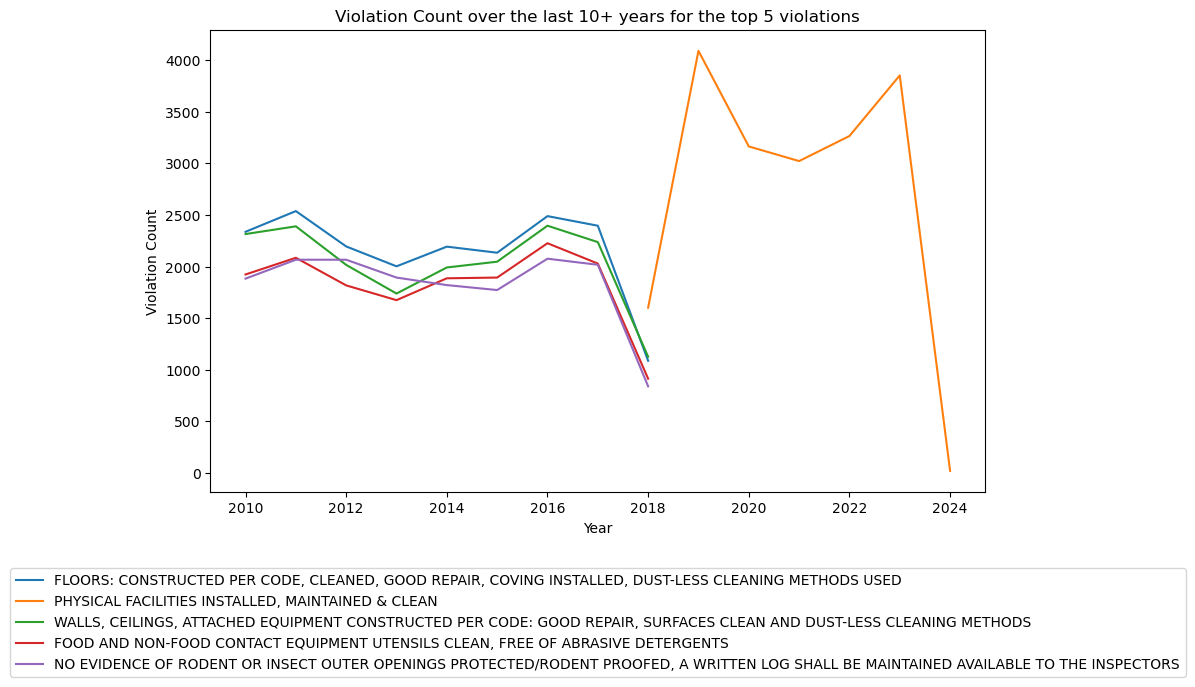

In [147]:
plt.figure(figsize=(10, 6))
for k in range(5):
    yrCon = list()
    for index,row in df.iterrows():
        for j in row['descriptions']:
            if j[0] == top_5[k] or j[1] == top_5[k]:
                yrCon.append(row['Year'])
    plt.plot(pd.Series(yrCon).value_counts().sort_index().index,pd.Series(yrCon).value_counts().sort_index(),label=top_5[k])
    
plt.xlabel('Year')
plt.ylabel('Violation Count')
plt.title('Violation Count over the last 10+ years for the top 5 violations')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=1)
plt.show()

The graph shows that theres a dip in 2018 in the frequently occuring food violations and sudden surge of one particular food violation. On some further reading, it is found that the food laws of Chicago changed effected July 1, 2018 which is why the old laws take a dip and the new law (most frequent in recent years) is seen peaking